<a href="https://colab.research.google.com/github/sulemantech/12v12/blob/master/Character_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow tensorflow-datasets


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [ ]:
# Load the EMNIST dataset (letters and digits)
dataset, info = tfds.load('emnist', with_info=True, as_supervised=True)

# Split the dataset into train and test sets
train_data, test_data = dataset['train'], dataset['test']


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/byclass/incomplete.8N3D38_3.1.0/emnist-train.tfrecord*...:   0%|   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/byclass/incomplete.8N3D38_3.1.0/emnist-test.tfrecord*...:   0%|    …

Dataset emnist downloaded and prepared to /root/tensorflow_datasets/emnist/byclass/3.1.0. Subsequent calls will reuse this data.


In [ ]:
# Normalize the images and reshape to (28, 28, 1)
def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    image = tf.reshape(image, (28, 28, 1))  # 28x28 grayscale images
    return image, label

# Apply preprocessing to train and test datasets
train_data = train_data.map(preprocess).batch(32).shuffle(60000)
test_data = test_data.map(preprocess).batch(32)


In [ ]:
# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),

    layers.Dense(64, activation='relu'),

    # Output layer (36 classes: 26 letters + 10 digits)
    layers.Dense(36, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train the model
model.fit(train_data, epochs=5)


Epoch 1/5
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 691s 29ms/step - accuracy: 0.8722 - loss: 0.3420
Epoch 2/5
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 731s 28ms/step - accuracy: 0.8722 - loss: 0.3391
Epoch 3/5
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 681s 28ms/step - accuracy: 0.8740 - loss: 0.3335
Epoch 4/5
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 684s 28ms/step - accuracy: 0.8756 - loss: 0.3290
Epoch 5/5
16026/21811 ━━━━━━━━━━━━━━━━━━━━ 2:39 28ms/step - accuracy: 0.8767 - loss: 0.3254

In [4]:
dataset, info = tfds.load('emnist/byclass', with_info=True, as_supervised=True)


In [5]:
# Output layer (62 classes for byclass split)
layers.Dense(62, activation='softmax')


<Dense name=dense, built=False>

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21811/21811 ━━━━━━━━━━━━━━━━━━━━ 615s 25ms/step - accuracy: 0.7876 - loss: 0.6802
Epoch 2/5
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 600s 24ms/step - accuracy: 0.8571 - loss: 0.3932
Epoch 3/5
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 618s 25ms/step - accuracy: 0.8632 - loss: 0.3699
Epoch 4/5
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 595s 25ms/step - accuracy: 0.8681 - loss: 0.3563
Epoch 5/5
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 599s 25ms/step - accuracy: 0.8707 - loss: 0.3452
3636/3636 ━━━━━━━━━━━━━━━━━━━━ 44s 12ms/step - accuracy: 0.8625 - loss: 0.3733
Test accuracy: 0.8621940612792969
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
Predicted label: 24


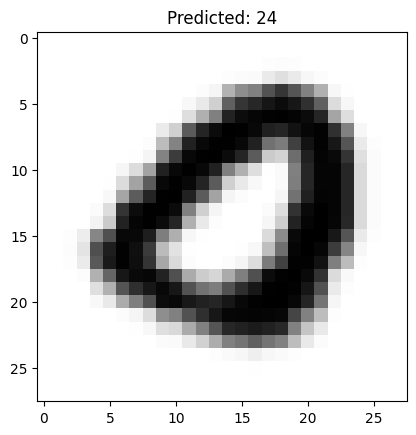

In [6]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load the EMNIST dataset (byclass split, which has 62 classes)
dataset, info = tfds.load('emnist/byclass', with_info=True, as_supervised=True)

# Split the dataset into train and test sets
train_data, test_data = dataset['train'], dataset['test']

# Preprocess the data (normalize images and reshape)
def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    image = tf.reshape(image, (28, 28, 1))  # 28x28 grayscale images
    return image, label

# Apply preprocessing to train and test datasets
train_data = train_data.map(preprocess).batch(32).shuffle(60000)
test_data = test_data.map(preprocess).batch(32)

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),

    layers.Dense(64, activation='relu'),

    # Output layer changed to 62 classes for 'byclass' split
    layers.Dense(62, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_data, epochs=5)

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_data)
print(f"Test accuracy: {test_acc}")

# Make predictions on the test dataset
for image, label in test_data.take(1):
    plt.imshow(image[0].numpy().reshape(28, 28), cmap=plt.cm.binary)
    predicted_label = model.predict(image)[0].argmax()
    print(f"Predicted label: {predicted_label}")
    plt.title(f"Predicted: {predicted_label}")
    plt.show()


In [7]:
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_data)
print(f"Test accuracy: {test_acc}")


3636/3636 ━━━━━━━━━━━━━━━━━━━━ 43s 12ms/step - accuracy: 0.8625 - loss: 0.3733
Test accuracy: 0.8621940612792969


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predicted label: 53


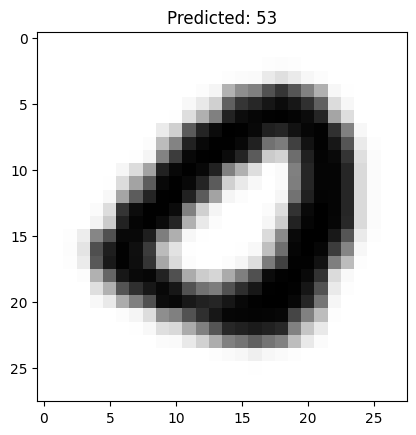

In [16]:
# Make predictions on the test dataset
for image, label in test_data.take(1):
    plt.imshow(image[0].numpy().reshape(28, 28), cmap=plt.cm.binary)
    predicted_label = model.predict(image)[10].argmax()
    print(f"Predicted label: {predicted_label}")
    plt.title(f"Predicted: {predicted_label}")
    plt.show()


In [12]:
# Save the trained model
model.save('text_and_digit_model.h5')
model.save('my_model.keras')


In [17]:
# Save the model as a Keras file (recommended format)
model.save('text_and_digit_model.keras')
